Primero, se importa las librerías necesarias:



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


El dataset "tips" está incluido en Seaborn, por lo que se puede cargarlo directamente:

In [3]:
df = sns.load_dataset("tips")


Se revisa las primeras filas para conocer los datos:

In [4]:
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Información del dataset:

In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


**Interpretación:**

*   Se tienen 7 columnas con diferentes tipos de datos.
*   No hay valores nulos (Non-Null Count es igual al total de filas).

Descripción estadística:

In [6]:
print(df.describe())


       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


**Interpretación:**

*   El gasto promedio (total_bill) es 19.79 USD.
*   La propina promedio (tip) es 2.99 USD.
*   El número de comensales (size) varía de 1 a 6 personas.


**Exploración de Datos y Limpieza: ¿Faltan datos?**

In [7]:
print(df.isnull().sum())


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


No hay valores nulos, no es necesario limpieza en este caso.

¿Cuántos registros hay por género?

In [8]:
print(df["sex"].value_counts())


sex
Male      157
Female     87
Name: count, dtype: int64


Hay más hombres que mujeres en los datos.

¿Cómo se distribuyen los datos según día de la semana?

In [9]:
print(df["day"].value_counts())


day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


Más datos de viernes, sábado y domingo (probablemente los días de mayor tráfico en el restaurante).

**Análisis Exploratorio de Datos (EDA)**

**Relación entre total de la cuenta y propina**

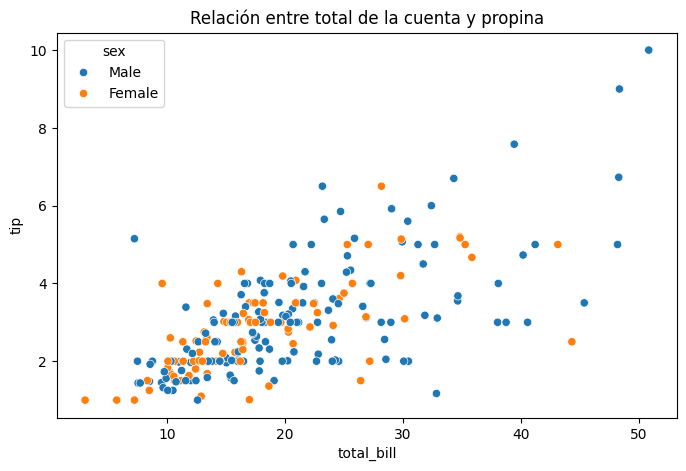

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="total_bill", y="tip", data=df, hue="sex")
plt.title("Relación entre total de la cuenta y propina")
plt.show()


Conclusión: A mayor cuenta, suele haber una mayor propina.

**Distribución de Propinas**

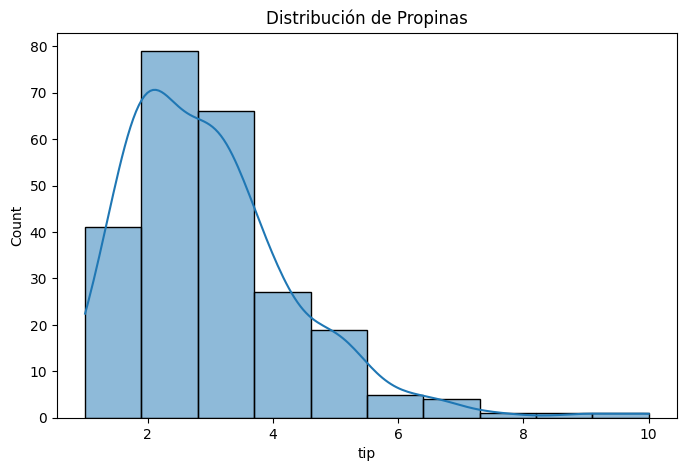

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["tip"], bins=10, kde=True)
plt.title("Distribución de Propinas")
plt.show()


 Conclusión: La mayoría de las propinas están entre 2 y 4 dólares.

**¿Quién deja más propina, hombres o mujeres?**

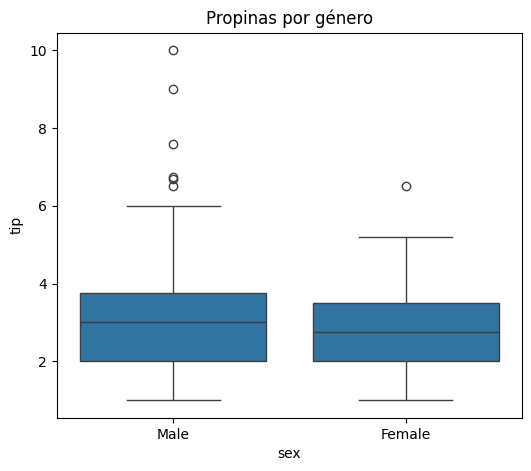

In [12]:
plt.figure(figsize=(6,5))
sns.boxplot(x="sex", y="tip", data=df)
plt.title("Propinas por género")
plt.show()


 Conclusión: Los hombres dejan propinas más altas en promedio.

**¿El día de la semana influye en la propina?**

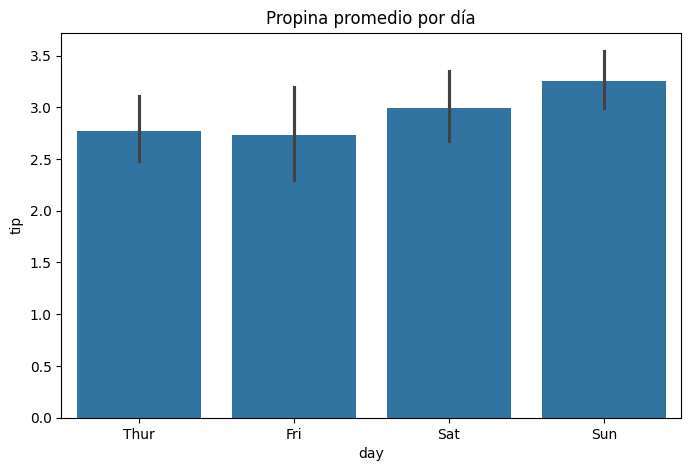

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x="day", y="tip", data=df, estimator=np.mean)
plt.title("Propina promedio por día")
plt.show()


Conclusión: Las propinas son mayores los fines de semana.

**Creación de una Nueva Métrica: % de Propina**

Se quiere saber qué porcentaje de la cuenta representa la propina:

In [15]:
df["tip_percentage"] = (df["tip"] / df["total_bill"]) * 100


Se revisan los primeros valores:

In [16]:
print(df[["total_bill", "tip", "tip_percentage"]].head())


   total_bill   tip  tip_percentage
0       16.99  1.01        5.944673
1       10.34  1.66       16.054159
2       21.01  3.50       16.658734
3       23.68  3.31       13.978041
4       24.59  3.61       14.680765


**Distribución del porcentaje de propina:**

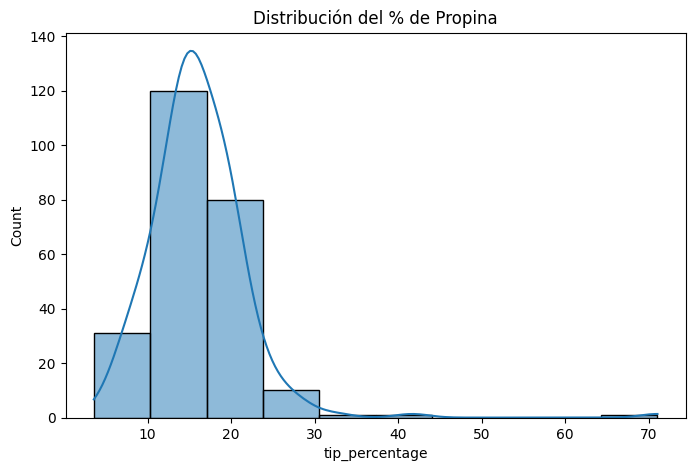

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["tip_percentage"], bins=10, kde=True)
plt.title("Distribución del % de Propina")
plt.show()


Conclusión: La mayoría de las propinas están entre 10% y 20% del total de la cuenta.

**¿El tamaño del grupo influye en la propina?**

Se puede analizar si los grupos más grandes dejan una mayor proporción de propina.

**Promedio de propina según tamaño del grupo**

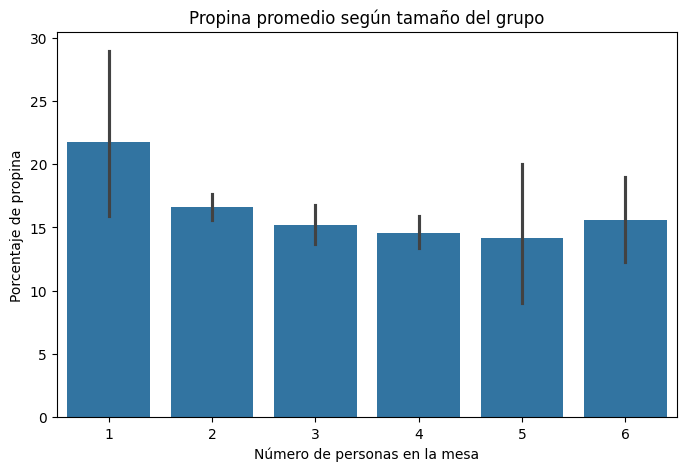

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x="size", y="tip_percentage", data=df, estimator=np.mean)
plt.title("Propina promedio según tamaño del grupo")
plt.xlabel("Número de personas en la mesa")
plt.ylabel("Porcentaje de propina")
plt.show()


**Conclusión:**

*   No hay un aumento claro en el porcentaje de propina a medida que el grupo crece.
*   Sin embargo, grupos pequeños (1-2 personas) tienden a dejar un porcentaje más alto de propina.


**¿Las personas que fuman dejan más propina que las que no fuman?**

Se verá si hay diferencias entre fumadores y no fumadores en términos de propina.

**Comparación entre fumadores y no fumadores**

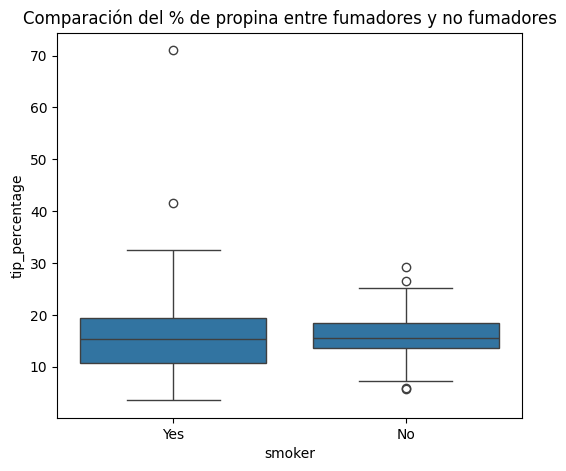

In [19]:
plt.figure(figsize=(6,5))
sns.boxplot(x="smoker", y="tip_percentage", data=df)
plt.title("Comparación del % de propina entre fumadores y no fumadores")
plt.show()


**Conclusión:**

La mediana del porcentaje de propina es muy similar entre fumadores y no

*  La mediana del porcentaje de propina es muy similar entre fumadores y no
fumadores.
*  Sin embargo, hay más valores atípicos (propinas muy altas) entre los no fumadores.

**¿Las propinas varían entre almuerzo y cena?**

El dataset tiene la columna "time" con dos categorías:

*   "Lunch" (almuerzo)
*   "Dinner" (cena)

**Promedio de propina según el turno**

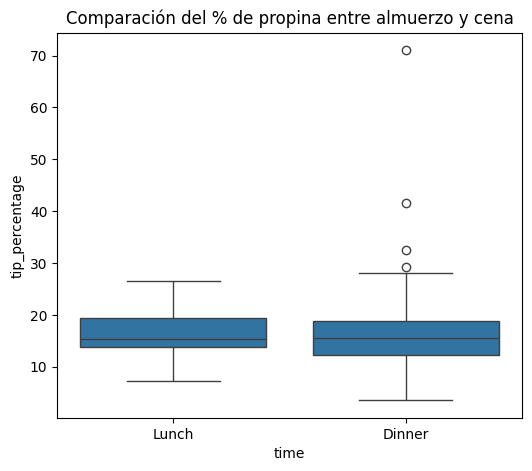

In [20]:
plt.figure(figsize=(6,5))
sns.boxplot(x="time", y="tip_percentage", data=df)
plt.title("Comparación del % de propina entre almuerzo y cena")
plt.show()


**Conclusión:**

*   En promedio, las propinas son ligeramente más altas en la cena.
*   Hay más variabilidad en las propinas de la cena, lo que indica que algunas personas dejan propinas significativamente mayores.


**¿La cuenta total es mayor en la cena?**

Si las cuentas son más altas en la cena, esto podría explicar por qué las propinas también son mayores.

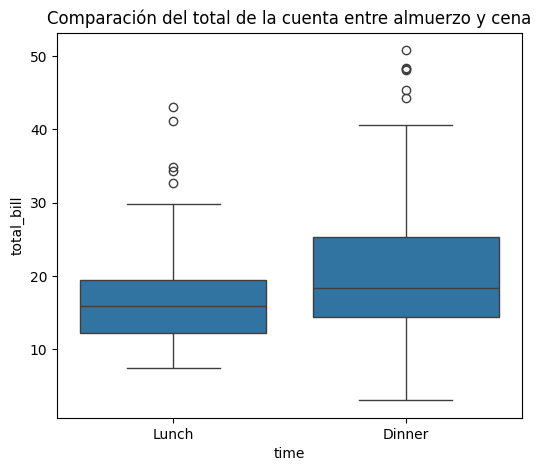

In [21]:
plt.figure(figsize=(6,5))
sns.boxplot(x="time", y="total_bill", data=df)
plt.title("Comparación del total de la cuenta entre almuerzo y cena")
plt.show()


**Conclusión:**

*   Las cuentas en la cena son más altas en promedio que en el almuerzo.
*   Esto sugiere que los clientes gastan más en la cena, lo que puede influir en el monto de la propina.




# **Hallazgos principales:**

*   La propina promedio es de 2.99 USD, lo que equivale a un 16% de la cuenta.
*   Las propinas más altas suelen darse en cuentas más grandes.
*   Los hombres dejan propinas más altas en promedio que las mujeres.
*   Las propinas son más altas los fines de semana, probablemente porque hay más clientes.
*   Las propinas tienden a ser más altas en la cena que en el almuerzo.
*   Las cuentas en la cena son más altas, lo que puede influir en el monto de la propina.
*   El porcentaje de propina es similar entre fumadores y no fumadores.
*   Los grupos pequeños (1-2 personas) suelen dejar un mayor porcentaje de propina.
